<font color="#CA0032"><h1 align="left">**Trabajo Final Master - Crypto - Blockchain**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales - Redes Neuronales Recurrentes profundas - LSTM**</h1></font>

<h2 align="left">Ejercicio de predicción de la serie temporal de Ethereum utilizando un modelo con una red neuronal LSTM</h2>


### **Usaremos un esquema many to one:**

<img src="https://drive.google.com/uc?export=download&id=1iokh576AiK2iFhftPogSBsNXixAi-LBg" align="center" style="float" width="500">

In [ ]:
COLAB = True

## <font color="#CA3532"> **1. Importar librerías**

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os

# fijo la semilla aleatoria por reproducibilidad
np.random.seed(7)

In [ ]:
def download_file_from_google_drive(file_id, dest_file, unzip=False):
  aux = "'https://drive.usercontent.google.com/download?id={}&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280'".format(file_id)
  !wget $aux -O $dest_file
  if unzip:
    !unzip -qq -o $dest_file
    !rm $dest_file

## <font color="#CA3532"> **2. Carga de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
# === Cargar dataset procesado desde tu carpeta===
# Ruta al fichero en tu drive/proyecto
data = pd.read_excel('/content/drive/MyDrive/Master_Inteligencia_Artificial_MBIT/TFM Crypto - Blockchain/Prediccion series temporales Bitcoin y Ethereum/Prediccion serie temporal Ethereum con Red Neuronal LSTM - TFM Crypto Blockchain/Dataset_final_Ethereum.xlsx')


# Vista rápida
data.head(20)

,Fecha,Dia_semana,Mes,No_laborable_festivo,Cierre_ETH,Cierre_BTC,Cierre_Oro,Cierre_S&P_500,Cierre_Nasdaq_100,Cierre_Dow_Jones,Cierre_Euro_Stoxx_50,Bono_EEUU_10años,Bono_EEUU_30años,Bono_Alemania_10años
0,2016-03-10,4,3,0,11.75,415.8,1271.44,1989.6,4286.97,16995.13,2970.78,1.936,2.699,0.297
1,2016-03-11,5,3,0,11.95,419.1,1248.44,2022.2,4361.83,17213.31,3073.80,1.980,2.749,0.280
2,2016-03-12,6,3,1,12.92,410.4,1248.44,2022.2,4361.83,17213.31,3073.80,1.980,2.749,0.280
3,2016-03-13,7,3,1,15.07,412.4,1248.44,2022.2,4361.83,17213.31,3073.80,1.980,2.749,0.280
4,2016-03-14,1,3,0,12.50,414.3,1235.28,2019.6,4367.33,17229.13,3091.98,1.961,2.732,0.280
5,2016-03-15,2,3,0,13.06,415.1,1232.38,2015.9,4367.08,17251.53,3067.21,1.968,2.730,0.316
6,2016-03-16,3,3,0,12.88,415.9,1263.08,2027.2,4404.20,17325.76,3062.05,1.913,2.711,0.310
7,2016-03-17,4,3,0,10.74,418.2,1257.90,2040.6,4400.26,17481.49,3043.10,1.898,2.688,0.233
8,2016-03-18,5,3,0,10.74,408.2,1255.30,2049.6,4410.83,17602.30,3059.77,1.877,2.680,0.218
9,2016-03-19,6,3,1,10.31,408.7,1255.30,2049.6,4410.83,17602.30,3059.77,1.877,2.680,0.218


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,3494,2020-12-20 11:59:59.999999744,2016-03-10 00:00:00,2018-07-31 06:00:00,2020-12-20 12:00:00,2023-05-12 18:00:00,2025-10-02 00:00:00,NaN
Dia_semana,3494.0,4.0,1.0,2.0,4.0,6.0,7.0,2.0
Mes,3494.0,6.502003,1.0,4.0,7.0,9.0,12.0,3.380511
No_laborable_festivo,3494.0,0.311391,0.0,0.0,0.0,1.0,1.0,0.463129
Cierre_ETH,3494.0,1361.569671,6.7,200.035,1047.6,2359.305,4831.21,1298.389594
Cierre_BTC,3494.0,29069.191185,408.2,6519.55,16930.85,43896.65,123323.4,30488.061118
Cierre_Oro,3494.0,1785.051583,1128.43,1304.88,1756.14,1949.1525,3881.94,559.512603
Cierre_S&P_500,3494.0,3729.993515,1989.6,2723.325,3664.64,4471.97,6711.2,1202.238212
Cierre_Nasdaq_100,3494.0,11630.636225,4201.06,6940.07,11534.595,15202.4,24860.65,5348.077831
Cierre_Dow_Jones,3494.0,30203.800667,16995.13,24706.35,29888.78,34905.1675,46441.1,7462.793025


In [ ]:
!ls "/content/drive/MyDrive/Master_Inteligencia_Artificial_MBIT/TFM Crypto - Blockchain/Prediccion series temporales Bitcoin y Ethereum/Prediccion serie temporal Ethereum con Red Neuronal LSTM - TFM Crypto Blockchain"
#verificamos que tenemos utilidades de series y el nuevo fichero

Dataset_final_Ethereum.xlsx
Ethereum_2016_2025_Series_temporales_LSTM_endógena_y_exógenas.ipynb
my_utils_series_temporales.py.zip


In [ ]:
data.shape

(3494, 14)

## <font color="#CA3532"> **3. Preprocesado inicial y visualización de datos**

In [ ]:
type(data['Fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# La fecha es un string, la pasamos a formato fecha de pandas:
#data['Date'] = pd.to_datetime(data['Date'])
#type(data['Date'][0])

In [ ]:
#data = data[data.Fecha >= '2021-03-01'] #Filtramos los datos solo a partir de marzo del año 2021

In [ ]:
data['Fecha']

,Fecha
0,2016-03-10
1,2016-03-11
2,2016-03-12
3,2016-03-13
4,2016-03-14
...,...
3489,2025-09-28
3490,2025-09-29
3491,2025-09-30
3492,2025-10-01


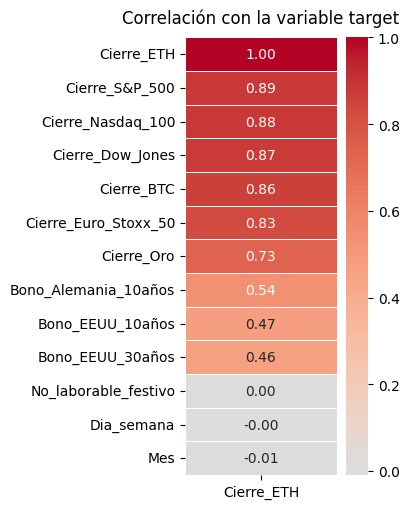

In [ ]:
#Heatmap con las correlaciones lineales entre la variable target (Cierre_ETH) y las variables numéricas explicativas
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las correlaciones con la variable target
corr_target = data.corr(numeric_only=True)['Cierre_ETH'].sort_values(ascending=False).to_frame()

# Crear el gráfico
plt.figure(figsize=(4, len(corr_target) * 0.4))  # Ajusta altura según número de variables
sns.heatmap(corr_target,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            cbar=True,
            linewidths=0.5,
            linecolor="white",
            annot_kws={"size": 10})

# Ajustar etiquetas y diseño para evitar solapamientos
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Correlación con la variable target", pad=10)
plt.tight_layout()
plt.show()

Como podemos observar en el grafico anterior del Heatmap de correlaciones, existe una correlacion lineal bastante alta entre la variable target y varias de las variables explicativas, destacando la serie temporal de Bitcoin, varios indices bursatiles y la serie temporal del precio Spot del Oro.

In [ ]:
#convierte cada columna del dataframe en array de NumPy
fechas      = data['Fecha'].values
target      = data['Cierre_ETH'].values.astype(float)

dow         = data['Dia_semana'].values.astype(int)   # categórica (1–7)
is_open     = data['No_laborable_festivo'].values.astype(float)      # binaria 0/1

btc    = data['Cierre_BTC'].values.astype(float)
gold    = data['Cierre_Oro'].values.astype(float)
sp_500    = data['Cierre_S&P_500'].values.astype(float) # Renamed from s&p_500
nasdaq_100    = data['Cierre_Nasdaq_100'].values.astype(float)
dow_jones    = data['Cierre_Dow_Jones'].values.astype(float) # Renamed from dow_jones
euro_stoxx_50    = data['Cierre_Euro_Stoxx_50'].values.astype(float) # Renamed from euro_stoxx_50
usa_bund_10y    = data['Bono_EEUU_10años'].values.astype(float)
usa_bund_30y    = data['Bono_EEUU_30años'].values.astype(float)
ger_bund_10y    = data['Bono_Alemania_10años'].values.astype(float)

month       = data['Mes'].values.astype(int)       # categórica (1–12) aunque luego no la meteremos como serie

In [ ]:
dow = dow - 1 #Para que los dias de la semana empiecen desde 0
month = month - 1 #Para que los numeros de mes empiecen desde 0

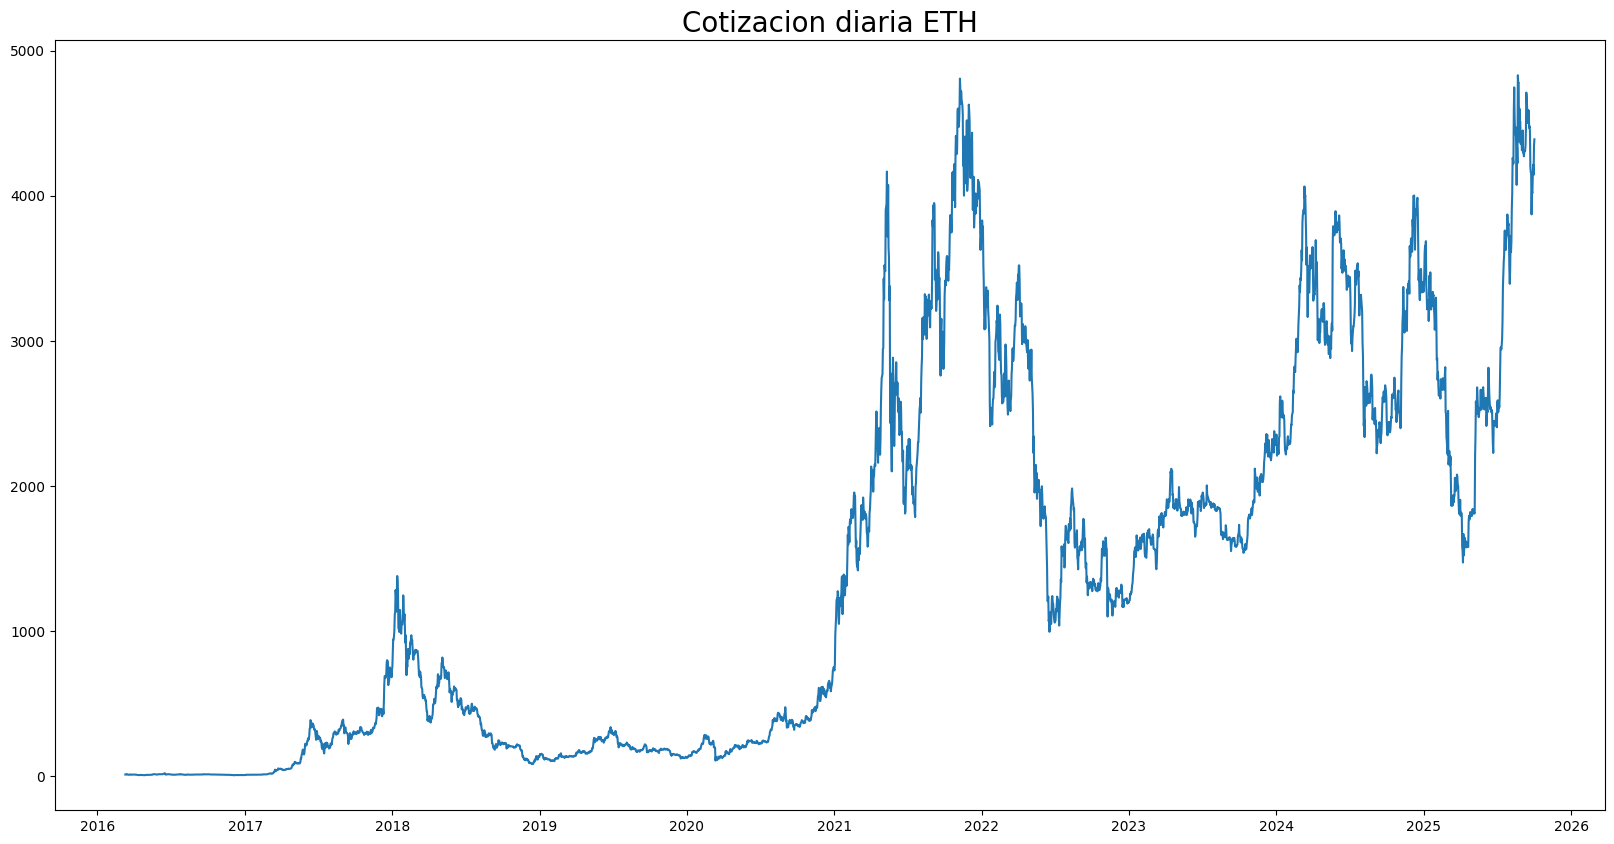

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(fechas, target)
plt.title('Cotizacion diaria ETH',
          fontsize=20);

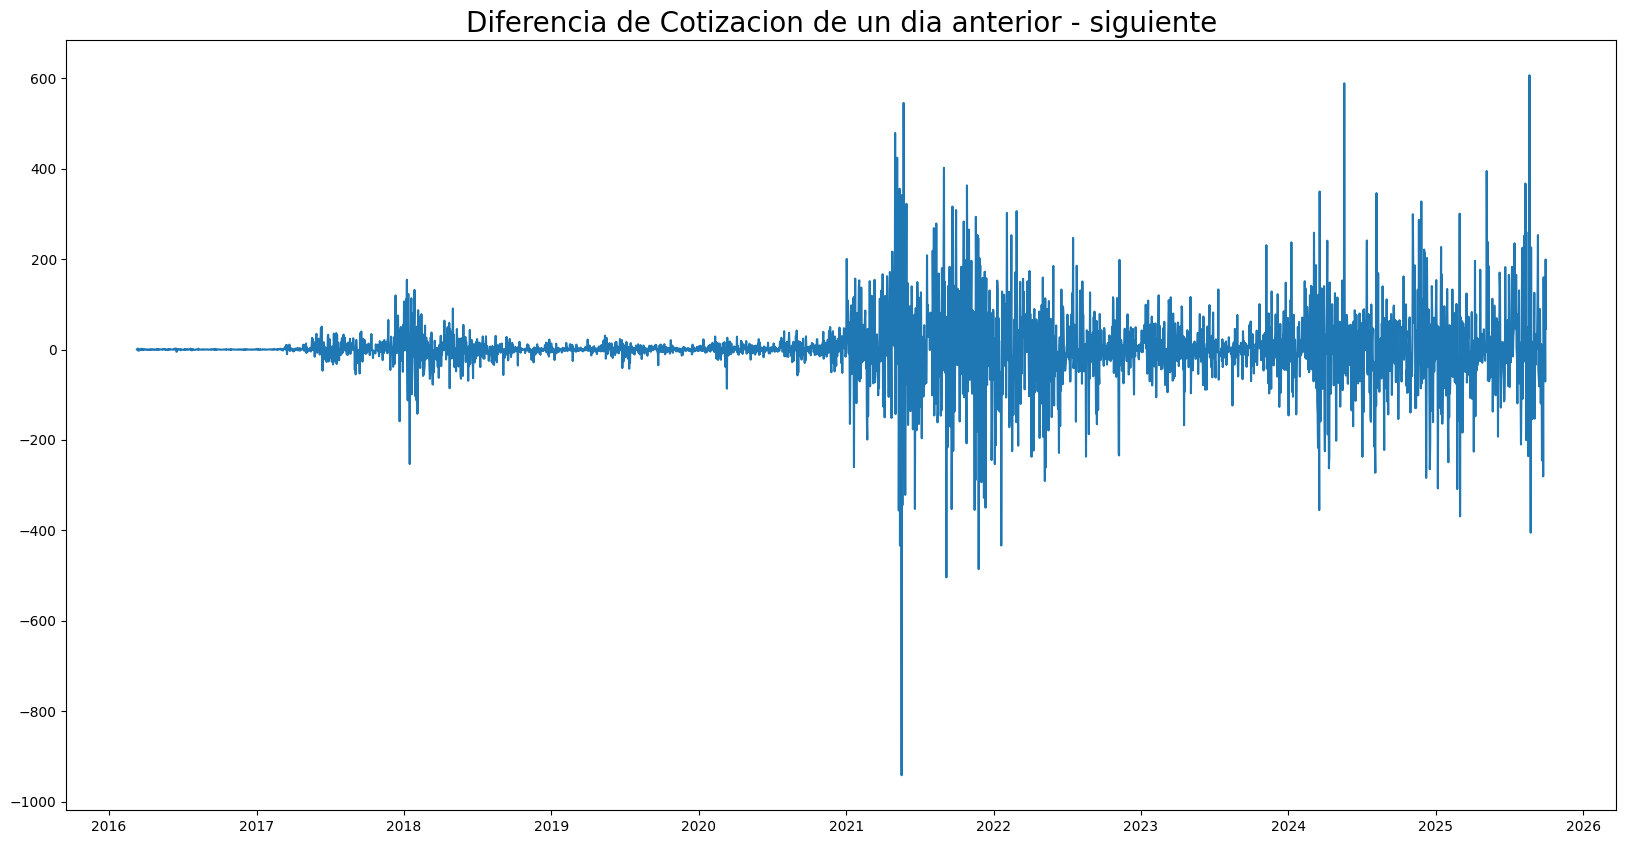

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(fechas[:-1], np.diff(target))
plt.title('Diferencia de Cotizacion de un dia anterior - siguiente',
          fontsize=20);

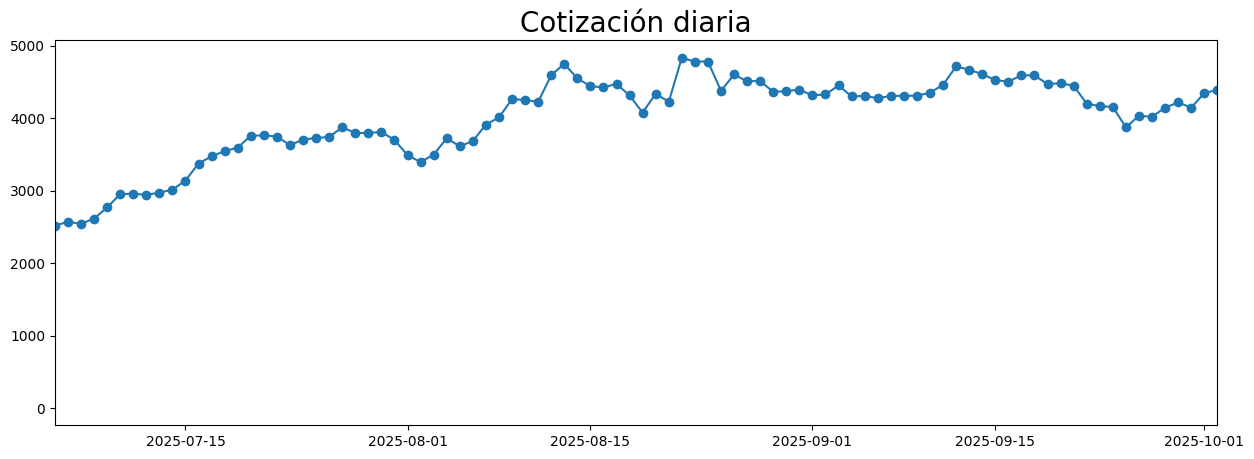

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, target, 'o-')
plt.title('Cotización diaria', fontsize=20)
plt.xlim([fechas[-90],fechas[-1]]);

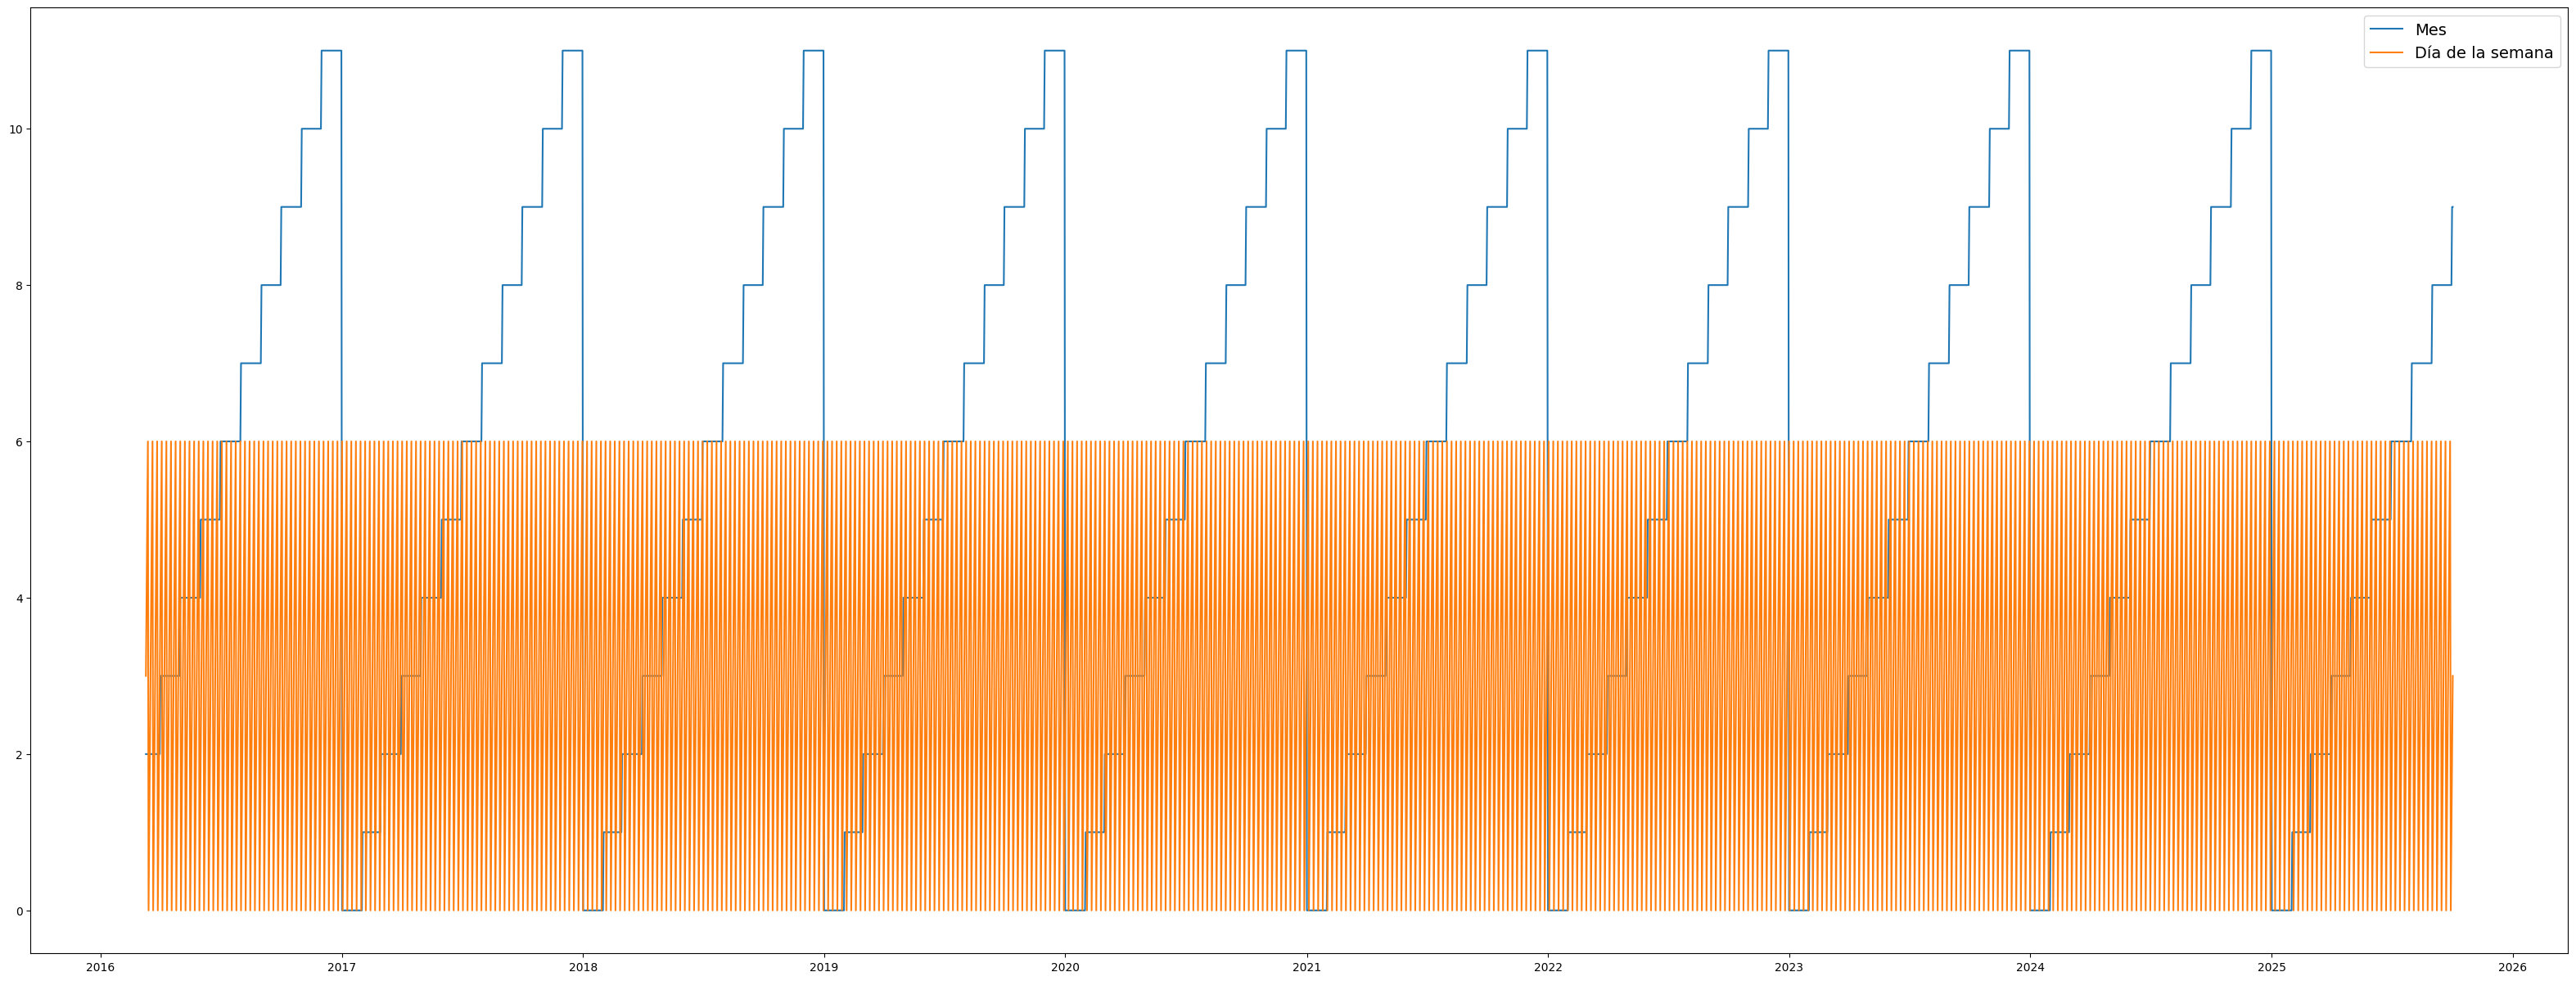

In [ ]:
plt.figure(figsize=(40,15))
plt.plot(fechas, month, label='Mes')
plt.plot(fechas, dow, label='Día de la semana')
plt.legend(fontsize=14);

Cotizacion media ETH   : 1361.5696708643388


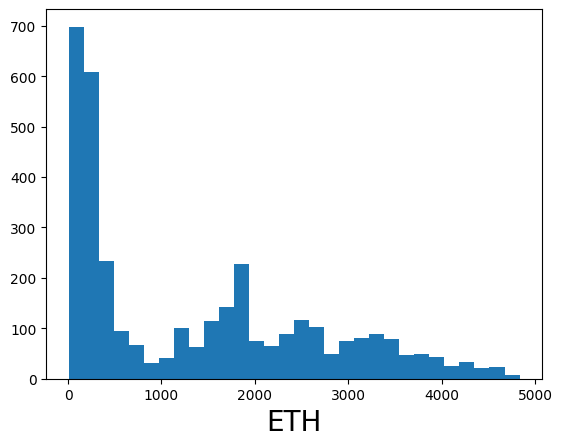

In [ ]:
plt.hist(target, bins=30)
plt.xlabel('ETH', fontsize=20)
print("Cotizacion media ETH   :", target.mean())

## <font color="#CA3532"> **4. Transformación de la variable a predecir**

In [ ]:
# Transformación de la variable a predecir (versión identidad)
import numpy as np

def transform(x):
  return np.asarray(x)
# No hace nada: deja pasar el array tal cual.


def inverse_transform(x):
  return np.asarray(x)
# Idem; no se usa para el target (usaremos y_scaler luego).



## <font color="#CA3532"> **5. Enventanado de datos**

In [ ]:
# Descargamos el archivo (my_utils_series_temporales.py.zip) con las formulas para enventanar los datos
if COLAB:
    download_file_from_google_drive(file_id='1IIM1alnaH4na9AWQrAZgP_L1fNmSrLTk',
                                    dest_file='./my_utils_series_temporales.py.zip', unzip=True)

--2025-11-11 20:36:40--  https://drive.usercontent.google.com/download?id=1IIM1alnaH4na9AWQrAZgP_L1fNmSrLTk&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.24.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [application/octet-stream]
Saving to: ‘./my_utils_series_temporales.py.zip’

./my_utils_series_t 100%[===================>]   1.96K  --.-KB/s    in 0s      

2025-11-11 20:36:42 (22.8 MB/s) - ‘./my_utils_series_temporales.py.zip’ saved [2010/2010]



In [ ]:
from my_utils_series_temporales import int2dummy, enventanar, info_enventanado, NAN

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,3494,2020-12-20 11:59:59.999999744,2016-03-10 00:00:00,2018-07-31 06:00:00,2020-12-20 12:00:00,2023-05-12 18:00:00,2025-10-02 00:00:00,NaN
Dia_semana,3494.0,4.0,1.0,2.0,4.0,6.0,7.0,2.0
Mes,3494.0,6.502003,1.0,4.0,7.0,9.0,12.0,3.380511
No_laborable_festivo,3494.0,0.311391,0.0,0.0,0.0,1.0,1.0,0.463129
Cierre_ETH,3494.0,1361.569671,6.7,200.035,1047.6,2359.305,4831.21,1298.389594
Cierre_BTC,3494.0,29069.191185,408.2,6519.55,16930.85,43896.65,123323.4,30488.061118
Cierre_Oro,3494.0,1785.051583,1128.43,1304.88,1756.14,1949.1525,3881.94,559.512603
Cierre_S&P_500,3494.0,3729.993515,1989.6,2723.325,3664.64,4471.97,6711.2,1202.238212
Cierre_Nasdaq_100,3494.0,11630.636225,4201.06,6940.07,11534.595,15202.4,24860.65,5348.077831
Cierre_Dow_Jones,3494.0,30203.800667,16995.13,24706.35,29888.78,34905.1675,46441.1,7462.793025


In [ ]:
# en int2dummy el máximo marcado como entrada es un valor legal
# posiblemente cambiemos semana por prox_fin_mes pero será continua, usaremos dow 0..6 month 0..11 o mes ojo como nombramos en los arrays
# One-hot encoding únicamente para Month (0..11)
# Nota: int2dummy incluye el valor máximo, por eso ponemos 0, 11
one_hot_month = int2dummy(month, 0, 11)
one_hot_day_of_week = int2dummy(dow, 0, 6)

print(month.shape)          # (n,)
print(one_hot_month.shape)  # (n, 12)
print(one_hot_month[:5])    # vistazo a las primeras filas
print(dow.shape)            # (n,)
print(one_hot_day_of_week.shape)  # (n, 7)
one_hot_day_of_week[:5]     # vistazo a las primeras filas

(3494,)
(3494, 12)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(3494,)
(3494, 7)


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
month.shape

(3494,)

In [ ]:
#desplegamos como se ha codificado mes hasta 12 columnas con 5556 instancias
one_hot_month

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
#vemos la shape para las 2 variables codificadas, semana es altura de mes en el que está, en nuesto caso 2 variables mes 0..11 dow 0..6
print(one_hot_month.shape, one_hot_day_of_week.shape)

(3494, 12) (3494, 7)


In [ ]:
# 1) Target sin escalar aquí
target_transf = transform(target)

# 2) Construcción de 'series' con los arrays disponibles
series = [
    target_transf,  # 0 - TARGET
    is_open,        # 1
    btc,            # 2
    gold,           # 3
    sp_500,         # 4
    nasdaq_100,     # 5
    dow_jones,      # 6
    euro_stoxx_50,    # 7
    usa_bund_10y,     # 8
    usa_bund_30y,     # 9
    ger_bund_10y,     # 10
]

nombres_series = [
    "target_transf",
    "is_open",
    "btc", "gold", "sp_500", "nasdaq_100", "dow_jones", "euro_stoxx_50",
    "usa_bund_10y", "usa_bund_30y", "ger_bund_10y"
]

# 3) Se_saben_antes: False solo para target
se_saben_antes = [
    False,   # target
    True,           # open
    False, False, False, False, False, False, False, False, False      # btc, gold, sp_500, nasdaq_100...
]

# 4) Convertir todo a float32 (Keras feliz)
series = [np.asarray(s, dtype=np.float32) for s in series]

print(len(series), len(nombres_series), len(se_saben_antes))

11 11 11


In [ ]:
# agregamos las columnas que hemos creado con ohe OJO NO CORRER DOS veces porque agregamos más columnas de las necesarias
for i in range(one_hot_month.shape[1]):
    series.append(one_hot_month[:, i])
    nombres_series.append(f"month_{i}")
    se_saben_antes.append(True)

for i in range(one_hot_day_of_week.shape[1]):
    series.append(one_hot_day_of_week[:,i])
    nombres_series.append("day"+str(i+1))
    se_saben_antes.append(True)

print(len(series), len(nombres_series), len(se_saben_antes))

30 30 30


In [ ]:
#comprobamos que tenemos más columnas (variables) y que seguimos con el mismo número de instancias
print(np.shape(series))
print(np.shape(se_saben_antes))

(30, 3494)
(30,)


In [ ]:
lookback = 30 # lookback es otro sinónimo de W_in

# target=0 en siguiente línea quiere decir cuál es el índice del target en objeto "series":
X, y = enventanar(series, target=0, se_saben_antes=se_saben_antes,
                  W_in=lookback)

print(X.shape, np.shape(y))

(3494, 30, 30) (3494,)


In [ ]:
info_enventanado(X[:10],y[:10],
                 nombres_series=nombres_series,
                 nombre_target="target",
                 tiempos=fechas)

10 ventanas creadas

X.shape=(10, 30, 30)  Y.shape=(10,) 

 Ventana 0: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,?25,?26,?27,?28,?29
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


 Ventana 1: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,?25,?26,?27,?28,2016-03-10T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000


 Ventana 2: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,?25,?26,?27,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000


 Ventana 3: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,?25,?26,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000


 Ventana 4: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,?25,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000


 Ventana 5: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,?24,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000,2016-03-14T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000,12.500000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994,414.299988
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941,1235.280029
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951,2019.599976
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078,4367.330078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547,17229.130859
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049,3091.979980
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000,1.961000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000,2.732000


 Ventana 6: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,?23,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000,2016-03-14T00:00:00.000000000,2016-03-15T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000,12.500000,13.060000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994,414.299988,415.100006
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941,1235.280029,1232.380005
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951,2019.599976,2015.900024
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078,4367.330078,4367.080078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547,17229.130859,17251.529297
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049,3091.979980,3067.209961
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000,1.961000,1.968000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000,2.732000,2.730000


 Ventana 7: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,?22,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000,2016-03-14T00:00:00.000000000,2016-03-15T00:00:00.000000000,2016-03-16T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000,12.500000,13.060000,12.880000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994,414.299988,415.100006,415.899994
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941,1235.280029,1232.380005,1263.079956
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951,2019.599976,2015.900024,2027.199951
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078,4367.330078,4367.080078,4404.200195
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547,17229.130859,17251.529297,17325.759766
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049,3091.979980,3067.209961,3062.050049
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000,1.961000,1.968000,1.913000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000,2.732000,2.730000,2.711000


 Ventana 8: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,?21,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000,2016-03-14T00:00:00.000000000,2016-03-15T00:00:00.000000000,2016-03-16T00:00:00.000000000,2016-03-17T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000,12.500000,13.060000,12.880000,10.740000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994,414.299988,415.100006,415.899994,418.200012
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941,1235.280029,1232.380005,1263.079956,1257.900024
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951,2019.599976,2015.900024,2027.199951,2040.599976
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078,4367.330078,4367.080078,4404.200195,4400.259766
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547,17229.130859,17251.529297,17325.759766,17481.490234
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049,3091.979980,3067.209961,3062.050049,3043.100098
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000,1.961000,1.968000,1.913000,1.898000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000,2.732000,2.730000,2.711000,2.688000


 Ventana 9: 


,?0,?1,?2,?3,?4,?5,?6,?7,?8,?9,?10,?11,?12,?13,?14,?15,?16,?17,?18,?19,?20,2016-03-10T00:00:00.000000000,2016-03-11T00:00:00.000000000,2016-03-12T00:00:00.000000000,2016-03-13T00:00:00.000000000,2016-03-14T00:00:00.000000000,2016-03-15T00:00:00.000000000,2016-03-16T00:00:00.000000000,2016-03-17T00:00:00.000000000,2016-03-18T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.750000,11.950000,12.920000,15.070000,12.500000,13.060000,12.880000,10.740000,10.740000
is_open,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
btc,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,415.799988,419.100006,410.399994,412.399994,414.299988,415.100006,415.899994,418.200012,408.200012
gold,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1271.439941,1248.439941,1248.439941,1248.439941,1235.280029,1232.380005,1263.079956,1257.900024,1255.300049
sp_500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1989.599976,2022.199951,2022.199951,2022.199951,2019.599976,2015.900024,2027.199951,2040.599976,2049.600098
nasdaq_100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4286.970215,4361.830078,4361.830078,4361.830078,4367.330078,4367.080078,4404.200195,4400.259766,4410.830078
dow_jones,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16995.130859,17213.310547,17213.310547,17213.310547,17229.130859,17251.529297,17325.759766,17481.490234,17602.300781
euro_stoxx_50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2970.780029,3073.800049,3073.800049,3073.800049,3091.979980,3067.209961,3062.050049,3043.100098,3059.770020
usa_bund_10y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.936000,1.980000,1.980000,1.980000,1.961000,1.968000,1.913000,1.898000,1.877000
usa_bund_30y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.699000,2.749000,2.749000,2.749000,2.732000,2.730000,2.711000,2.688000,2.680000


In [ ]:
print(X.shape)
print(np.shape(target))

(3494, 30, 30)
(3494,)


## <font color="#CA3532"> **6. Separación training-test** y además aplicaremos el MinMax escaler a los datos de Sales

In [ ]:
train_perc  = .8 #.8
punto_corte = int(len(X)*train_perc)

In [ ]:
X_train      = X[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
y_train      = y[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
target_train = target[lookback:punto_corte] # elimino los lookback primeros al tener NANs
fechas_train = fechas[lookback:punto_corte] # elimino los lookback primeros al tener NANs

X_test       = X[punto_corte:]
y_test       = y[punto_corte:]
target_test  = target[punto_corte:]
fechas_test  = fechas[punto_corte:]

print(np.shape(target_train))
print(np.shape(target_test))

(2765,)
(699,)


In [ ]:
2765+699+30

3494

In [ ]:
print(X_train.shape, y_train.shape)

(2765, 30, 30) (2765,)


In [ ]:
# Escalado Correcto: Dos scalers separados
from sklearn.preprocessing import StandardScaler

# 1. Scaler para features (X)
X_scaler = StandardScaler() #Aplicamos StandardScaler para hacer el escalado de los datos
# Reshape X_train to 2D for scaling
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, X_train.shape[2]))
# Reshape X_train_scaled back to 3D
X_train = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

# Reshape X_test to 2D for scaling
X_test_scaled = X_scaler.transform(X_test.reshape(-1, X_test.shape[2]))
# Reshape X_test_scaled back to 3D
X_test = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


# 2. Scaler para target (y)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
#y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

# 3. Utilidad para desescalar predicciones más adelante
def inverse_transform_y(x):
    return y_scaler.inverse_transform(np.asarray(x).reshape(-1,1)).ravel()

# 4. (Recomendado) Asegurar dtypes para Keras
X_train = X_train.astype('float32');  y_train = y_train.astype('float32')
X_test  = X_test.astype('float32');   y_test  = y_test.astype('float32')

Revisamos las variables que entrarán al modelo y la escala en la que estarán (para verificar rangos de -1..1

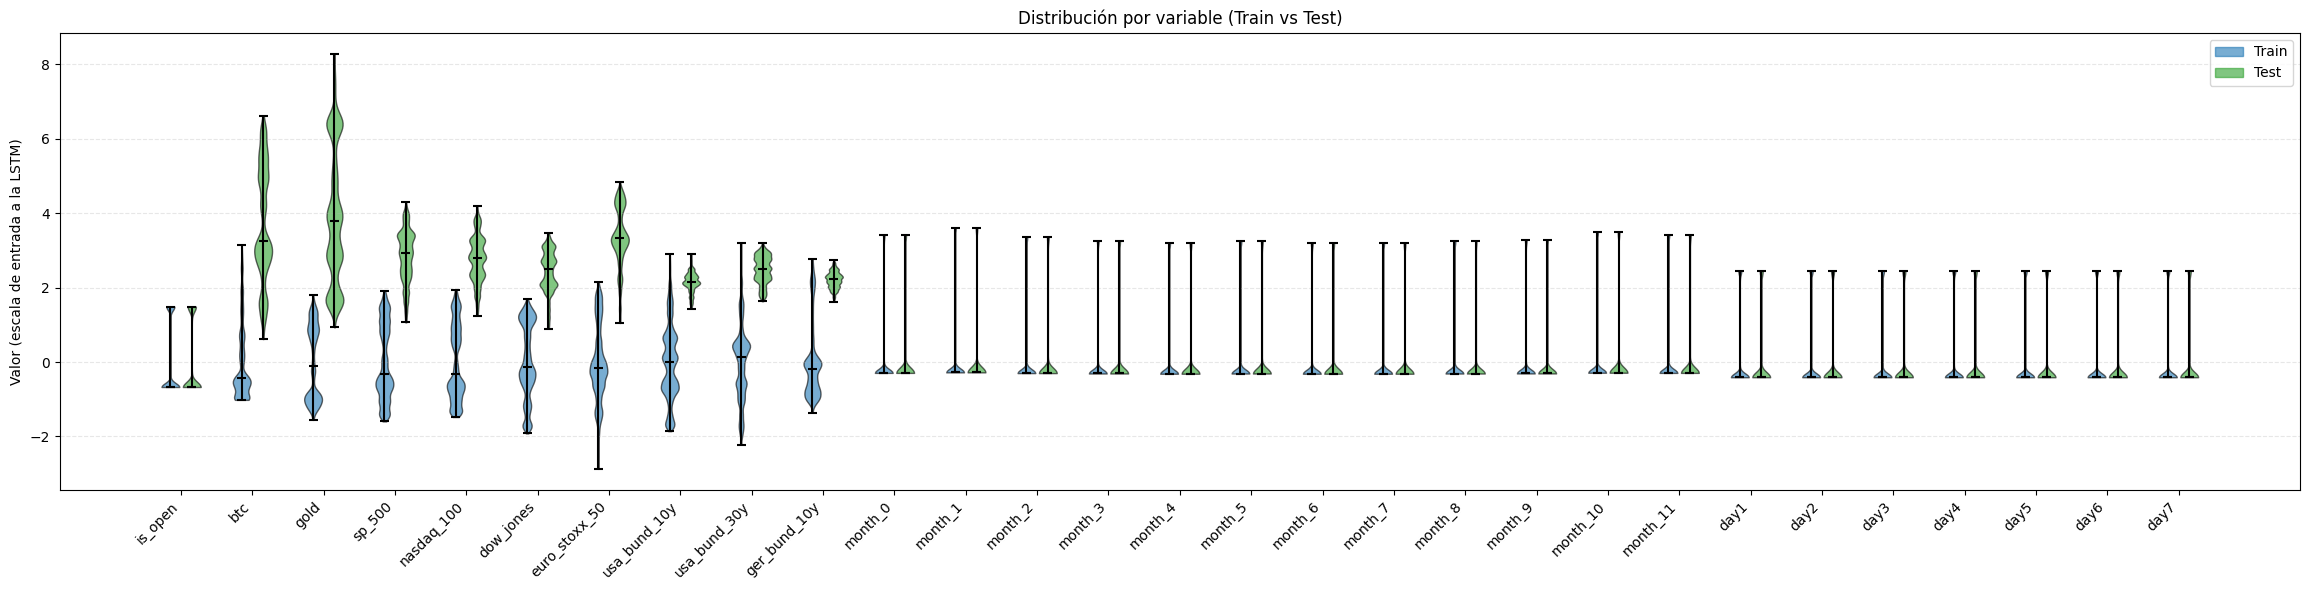

In [ ]:
# Violin plots of each feature (excluding target channel 0) with Train (blue) vs Test (green).
# Assumes variables available in the notebook: X_train, X_test, nombres_series

import numpy as np
import matplotlib.pyplot as plt

# Safety checks & setup
assert 'X_train' in globals() and 'X_test' in globals(), "X_train / X_test no encontrados."
assert 'nombres_series' in globals(), "nombres_series no encontrado."

# X shapes: (N, lookback, n_vars)
n_vars = X_train.shape[2]
feature_names = nombres_series  # length should be n_vars

# Build flattened distributions per feature excluding target (channel 0)
train_dists = []
test_dists  = []
labels      = []

for j in range(1, n_vars):  # exclude target at index 0
    # Flatten across (samples, timesteps)
    tr = X_train[:, :, j].reshape(-1)
    te = X_test[:,  :, j].reshape(-1)
    # Drop NaNs/Infs just in case
    tr = tr[np.isfinite(tr)]
    te = te[np.isfinite(te)]
    train_dists.append(tr)
    test_dists.append(te)
    labels.append(feature_names[j] if j < len(feature_names) else f"var_{j}")

# Positions for side-by-side violins
x = np.arange(len(labels))
offset = 0.15

fig = plt.figure(figsize=(max(10, len(labels)*0.8), 6))
ax = fig.add_subplot(1,1,1)

parts_tr = ax.violinplot(train_dists, positions=x - offset, widths=0.25, showmeans=False, showextrema=True, showmedians=True)
parts_te = ax.violinplot(test_dists,  positions=x + offset, widths=0.25, showmeans=False, showextrema=True, showmedians=True)

# Color styling per user request: Train blue, Test green
for pc in parts_tr['bodies']:
    pc.set_facecolor('tab:blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
parts_tr['cmedians'].set_color('black')
parts_tr['cbars'].set_color('black')
parts_tr['cmins'].set_color('black')
parts_tr['cmaxes'].set_color('black')

for pc in parts_te['bodies']:
    pc.set_facecolor('tab:green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
parts_te['cmedians'].set_color('black')
parts_te['cbars'].set_color('black')
parts_te['cmins'].set_color('black')
parts_te['cmaxes'].set_color('black')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title('Distribución por variable (Train vs Test)')
ax.set_ylabel('Valor (escala de entrada a la LSTM)')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

# Manual legend
import matplotlib.patches as mpatches
blue_patch  = mpatches.Patch(color='tab:blue', alpha=0.6, label='Train')
green_patch = mpatches.Patch(color='tab:green', alpha=0.6, label='Test')
ax.legend(handles=[blue_patch, green_patch])

plt.tight_layout()
plt.show()

Verificamos la escala en la que tenemos y_train test

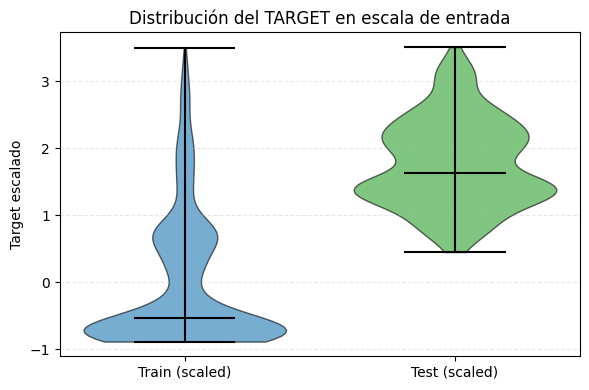

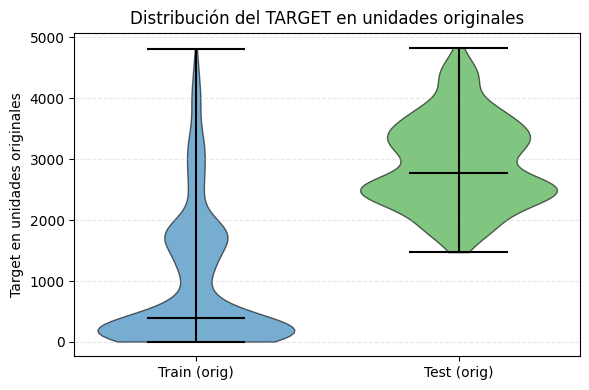

In [ ]:
# Violin plots for TARGET series: Train vs Test
# Assumes variables available: y_train, y_test (scaled), target_train, target_test (original), and y_scaler for inverse_transform

import numpy as np
import matplotlib.pyplot as plt

# Determine availability
have_scaled = 'y_train' in globals() and 'y_test' in globals()
have_original = 'target_train' in globals() and 'target_test' in globals()

if not have_scaled and not have_original:
    raise RuntimeError("No se encontraron ni y_train/y_test (escalados) ni target_train/target_test (originales).")

# 1) Violin plot en ESCALA DEL MODELO (si existe)
if have_scaled:
    fig1 = plt.figure(figsize=(6,4))
    ax1 = fig1.add_subplot(1,1,1)
    positions = [0.9, 1.1]
    parts_tr = ax1.violinplot([y_train], positions=[positions[0]], widths=0.15, showmedians=True, showextrema=True)
    parts_te = ax1.violinplot([y_test],  positions=[positions[1]], widths=0.15, showmedians=True, showextrema=True)

    # Colores
    for pc in parts_tr['bodies']:
        pc.set_facecolor('tab:blue'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_tr['cmedians'].set_color('black'); parts_tr['cbars'].set_color('black'); parts_tr['cmins'].set_color('black'); parts_tr['cmaxes'].set_color('black')

    for pc in parts_te['bodies']:
        pc.set_facecolor('tab:green'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_te['cmedians'].set_color('black'); parts_te['cbars'].set_color('black'); parts_te['cmins'].set_color('black'); parts_te['cmaxes'].set_color('black')

    ax1.set_xticks(positions)
    ax1.set_xticklabels(['Train (scaled)', 'Test (scaled)'])
    ax1.set_ylabel('Target escalado')
    ax1.set_title('Distribución del TARGET en escala de entrada')
    ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2) Violin plot en UNIDADES ORIGINALES (si existe o si podemos invertir)
if have_original:
    tr = np.asarray(target_train).reshape(-1)
    te = np.asarray(target_test).reshape(-1)
elif have_scaled and 'y_scaler' in globals():
    # Invertimos a unidades originales usando el scaler del target
    tr = y_scaler.inverse_transform(np.asarray(y_train).reshape(-1,1)).reshape(-1)
    te = y_scaler.inverse_transform(np.asarray(y_test).reshape(-1,1)).reshape(-1)
else:
    tr = None; te = None

if tr is not None and te is not None:
    fig2 = plt.figure(figsize=(6,4))
    ax2 = fig2.add_subplot(1,1,1)
    positions = [0.9, 1.1]
    parts_tr = ax2.violinplot([tr], positions=[positions[0]], widths=0.15, showmedians=True, showextrema=True)
    parts_te = ax2.violinplot([te], positions=[positions[1]], widths=0.15, showmedians=True, showextrema=True)

    for pc in parts_tr['bodies']:
        pc.set_facecolor('tab:blue'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_tr['cmedians'].set_color('black'); parts_tr['cbars'].set_color('black'); parts_tr['cmins'].set_color('black'); parts_tr['cmaxes'].set_color('black')

    for pc in parts_te['bodies']:
        pc.set_facecolor('tab:green'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_te['cmedians'].set_color('black'); parts_te['cbars'].set_color('black'); parts_te['cmins'].set_color('black'); parts_te['cmaxes'].set_color('black')

    ax2.set_xticks(positions)
    ax2.set_xticklabels(['Train (orig)', 'Test (orig)'])
    ax2.set_ylabel('Target en unidades originales')
    ax2.set_title('Distribución del TARGET en unidades originales')
    ax2.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## <font color="#CA3532"> **7. Construcción del modelo con Keras**

In [ ]:
#from keras.optimizers import Adam

In [ ]:
#hyperparametros   neurons, dropout
from keras import optimizers
from keras.layers import Dropout # Import the Dropout layer
from keras.optimizers import Adam # Import the Adam optimizer
from keras.models import Sequential # Import the Sequential model


neurons = 20
DROPOUT = 0.2
l_r           = 0.0005
#opt = optimizers.RMSprop(learning_rate=l_r)
opt = optimizers.Adam(learning_rate=l_r)

model = Sequential()
model.add(LSTM(neurons, input_shape=(lookback, X_train.shape[2]),
               #return_sequences=True,
               kernel_regularizer='l1',
               dropout=DROPOUT,
               #recurrent_dropout=0.2),
              )
)

model.add(Dropout(0.3)) # Add dropout after the 2nd LSTM Layer
model.add(Dense(1,))
model.compile(
              loss='mean_squared_error',
              #loss="mean_absolute_error",
              #optimizer='adam',
              optimizer=opt,
              #optimizer=Adam(learning_rate=0.001), # más rápido
              metrics=['mse', 'mae']) # 'RMSprop'
# mean_absolute_error

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.optimizer.learning_rate

<Variable path=adam/learning_rate, shape=(), dtype=float32, value=0.0005000000237487257>

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,101 (16.02 KB)

 Trainable params: 4,101 (16.02 KB)

 Non-trainable params: 0 (0.00 B)

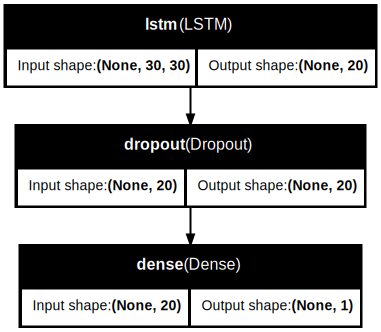

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

if COLAB:
  display(SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog="dot",
                                                                   format="svg")))
else:
  display(SVG(model_to_dot(model, show_shapes=True).create(prog="dot",
                                                           format="svg")))

In [ ]:
def grafica_entrenamiento(tr_mse, val_mse):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_mse)), tr_mse)
    plt.plot(1+np.arange(len(val_mse)), val_mse)
    plt.title('mse del modelo', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.ylabel('mse', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()


Epoch 1: val_mse improved from inf to 0.05705, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.05705

Epoch 1: val_mse did not improve from 0.05705

Epoch 1: val_mse improved from 0.05705 to 0.02315, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.02315 to 0.02054, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.02054 to 0.00900, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.00900 to 0.00706, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.00706 to 0.00622, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val

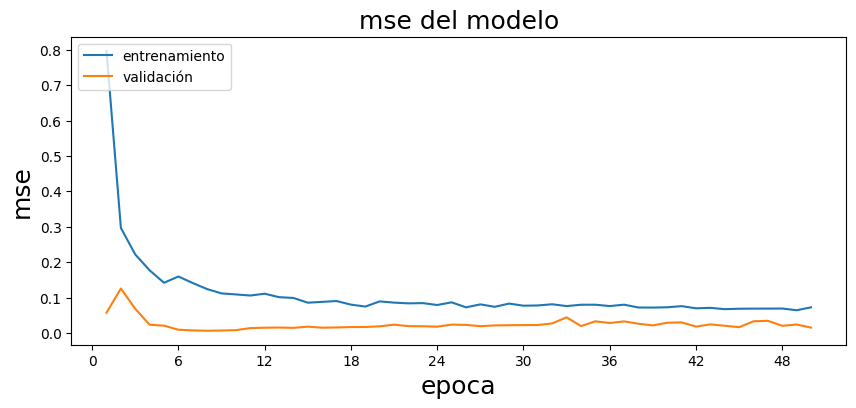


Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val

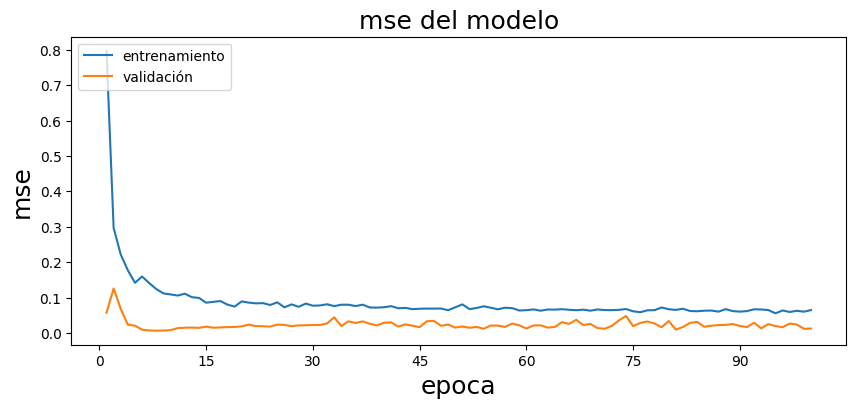


Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val

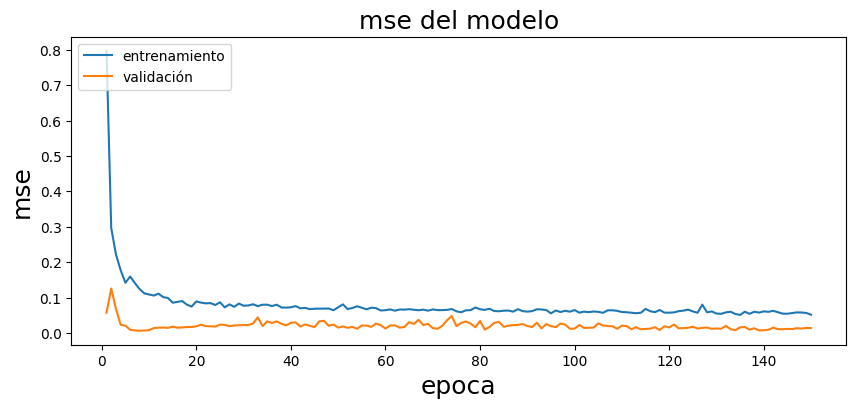


Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val

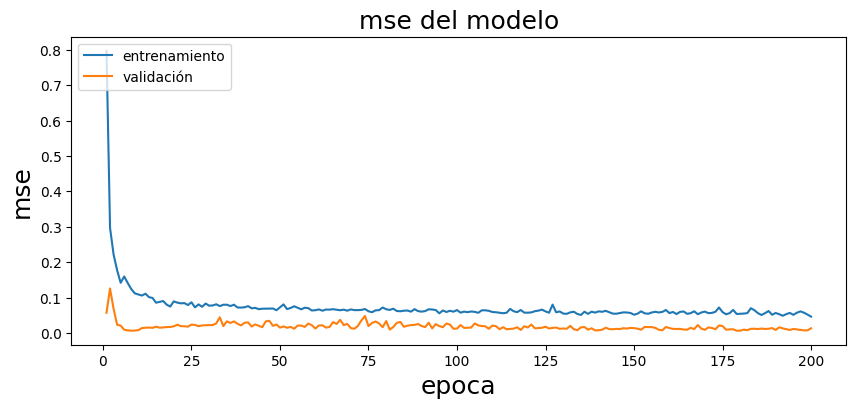


Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse did not improve from 0.00622

Epoch 1: val_mse improved from 0.00622 to 0.00604, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val

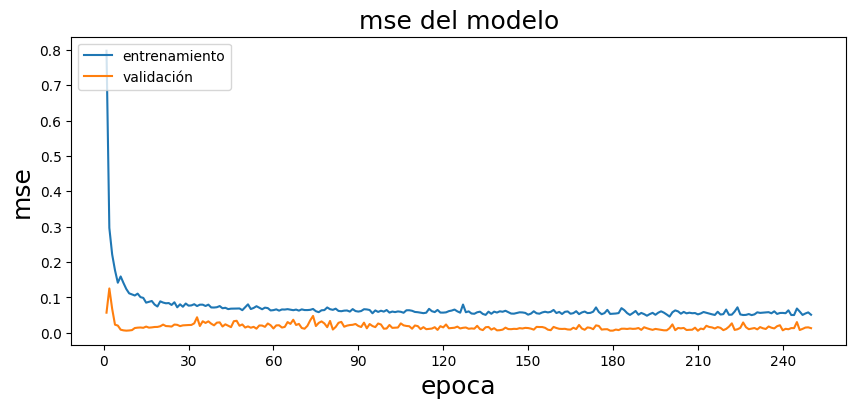


Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val_mse did not improve from 0.00604

Epoch 1: val


Epoch 1: val_mse did not improve from 0.00587

Epoch 1: val_mse did not improve from 0.00587


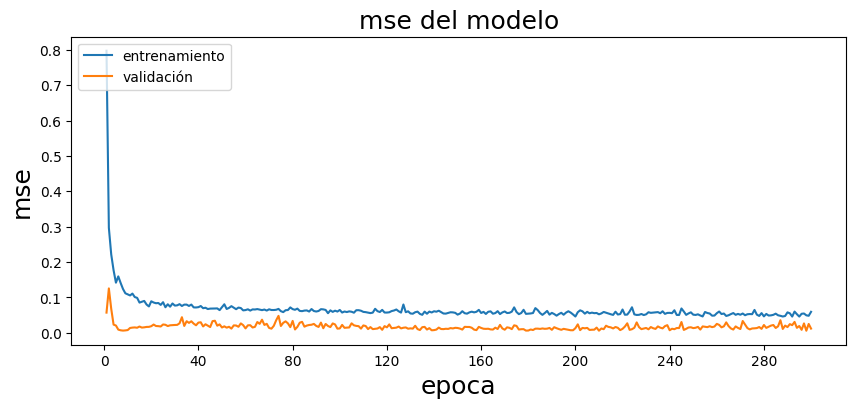

In [ ]:
epochs = 300
batch_size = 32 #64
Nval = 200
control_sobreajuste_val = True

if not control_sobreajuste_val:
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, verbose=2)
else:
    acum_tr_mse = []
    acum_val_mse = []
    modelpath="model_current_best.h5"
    checkpoint = ModelCheckpoint(modelpath, monitor='val_mse', verbose=2, # val_mean_squared_error
                                 save_best_only=True,
                                 mode='min') # graba sólo los que mejoran en validación

    callbacks_list = [checkpoint]

    for e in range(epochs):
        aux = X_train[:-Nval]
        history = model.fit(aux, y_train[:-Nval],
                            batch_size=batch_size,
                            epochs=1,
                            callbacks=callbacks_list,
                            verbose=0,
                            validation_data=(X_train[-Nval:], y_train[-Nval:]))

        acum_tr_mse  += history.history['mse'] # mean_squared_error
        acum_val_mse += history.history['val_mse'] # val_mean_squared_error

        if (e+1)%50 == 0:
            grafica_entrenamiento(acum_tr_mse, acum_val_mse)

In [ ]:
model = load_model(modelpath) # recupero el mejor modelo en validación

## <font color="#CA3532"> **8. Chequeo del modelo (predicción a un día)**

In [ ]:
y_train_prediction = model.predict(X_train).flatten()
y_test_prediction = model.predict(X_test).flatten()

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# aquí cambiamos el desescalamiento
# target_train_pred = inverse_transform(y_train_prediction)
# target_test_pred  = inverse_transform(y_test_prediction)
target_train_pred = inverse_transform_y(y_train_prediction)
target_test_pred  = inverse_transform_y(y_test_prediction)

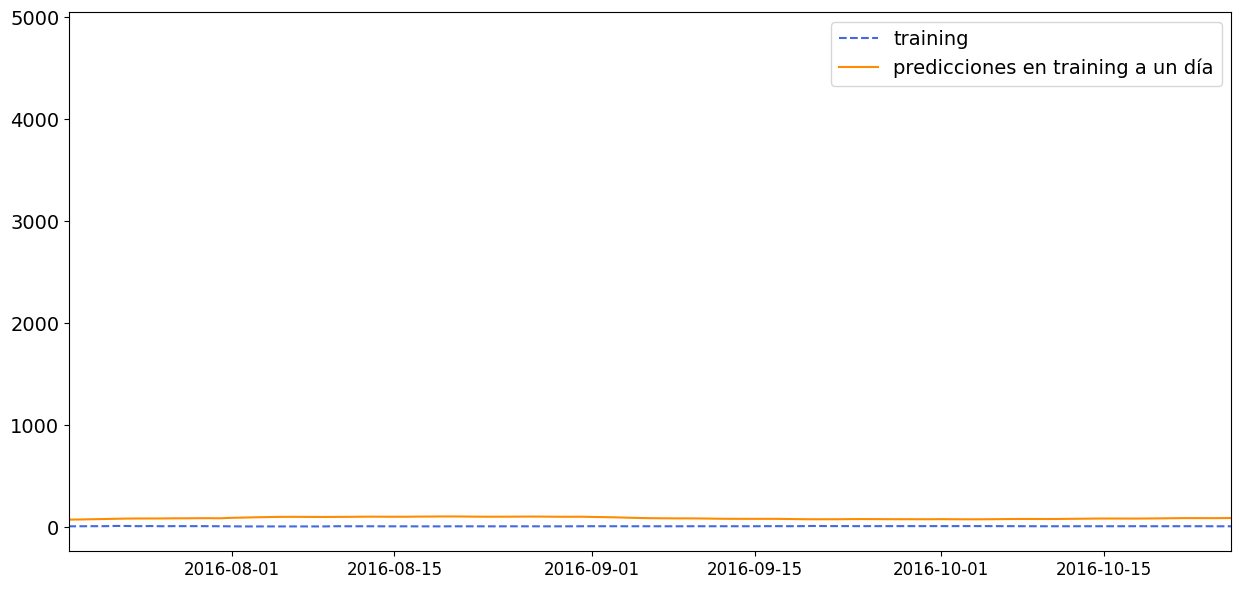

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label="training")
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label="predicciones en training a un día")

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[100],fechas_train[200]])
plt.legend(fontsize=14);

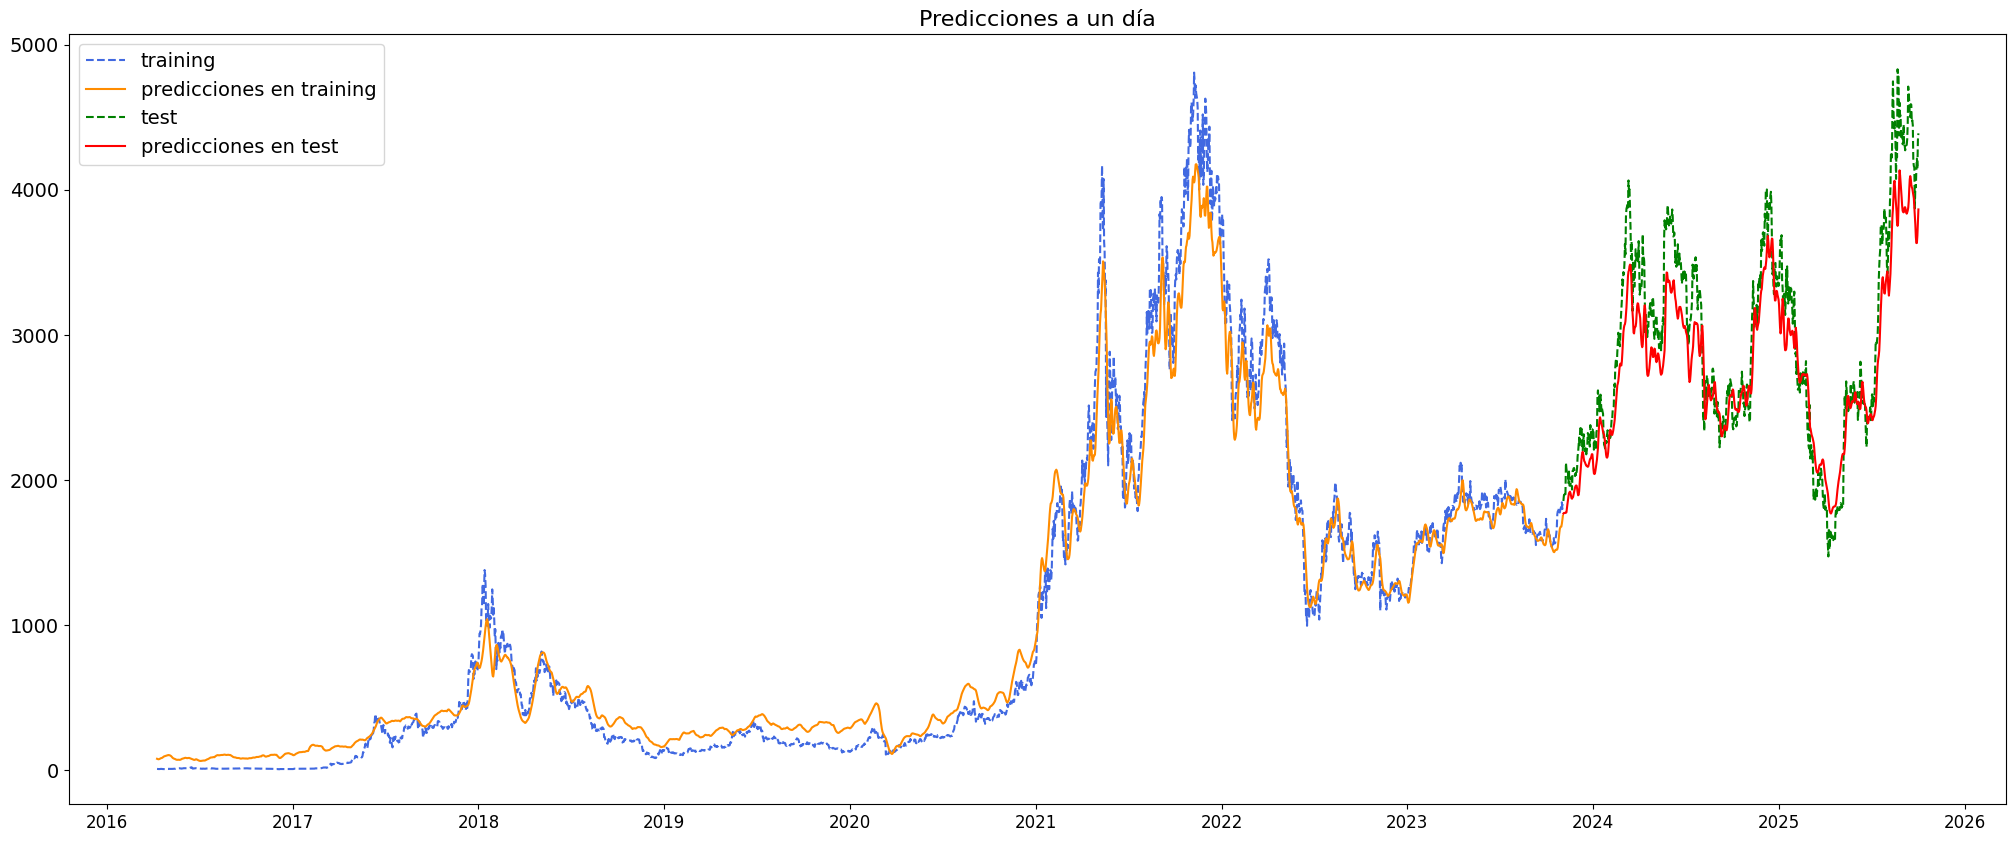

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Predicciones a un día', fontsize=16)
plt.legend(fontsize=14);

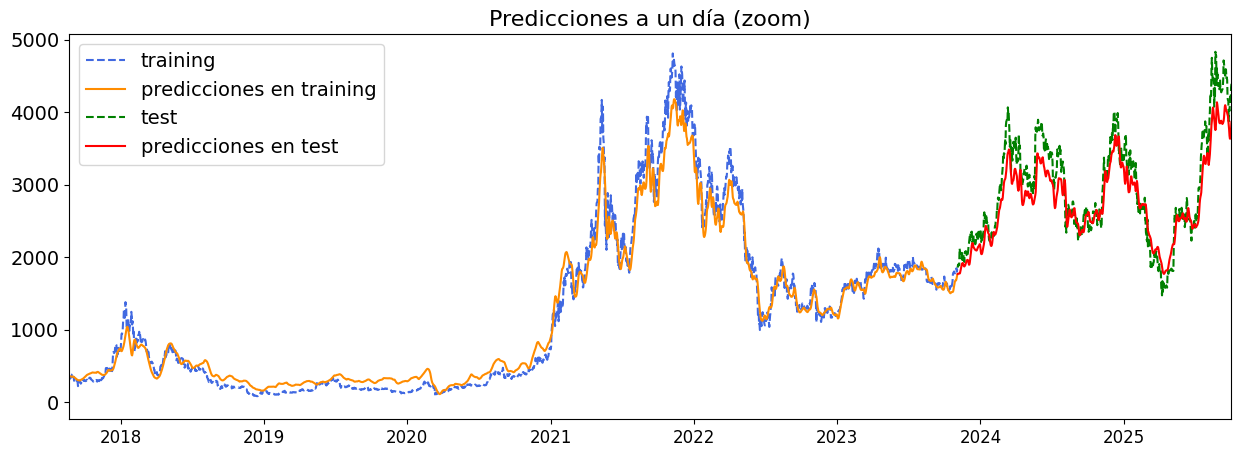

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.title('Predicciones a un día (zoom)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[500],fechas_test[-1]]);

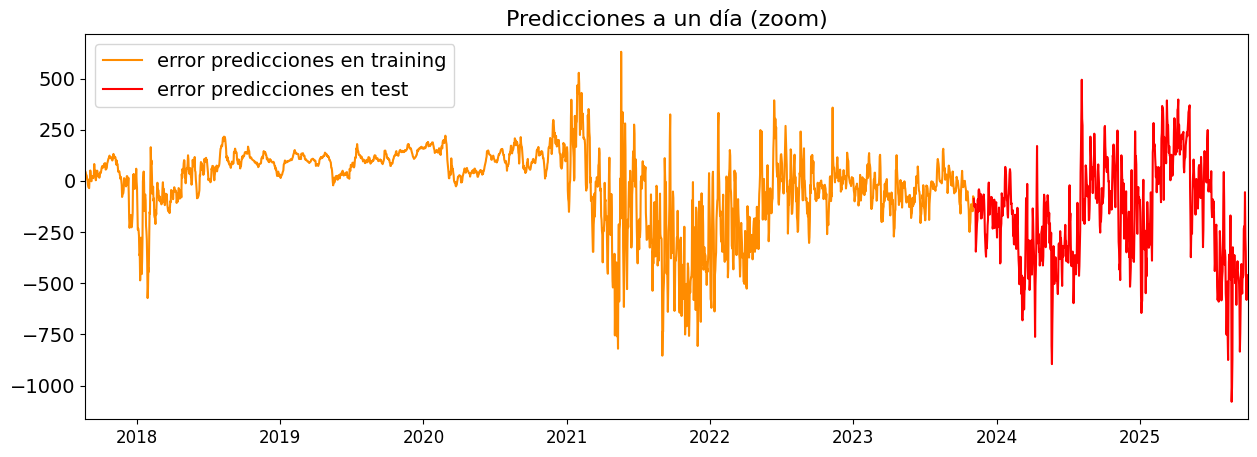

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train_pred - target_train,  c='darkorange',
         label='error predicciones en training')
plt.plot(fechas_test, target_test_pred - target_test,    c='red',
         label='error predicciones en test')
plt.title('Predicciones a un día (zoom)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[500],fechas_test[-1]]);

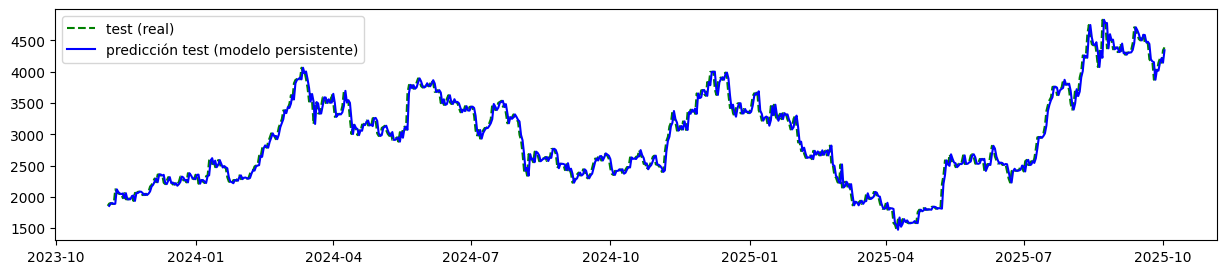

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test (real)')
plt.plot(fechas_test[1:], target_test[:-1], '-',   c='blue',
         label='predicción test (modelo persistente)')
plt.legend();

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# =======================
# 1) Métricas (escala original)
# =======================
rmse_train = np.sqrt(mean_squared_error(target_train[1:], target_train_pred[1:]))
rmse_test  = np.sqrt(mean_squared_error(target_test,  target_test_pred))

r2_train   = r2_score(target_train[1:], target_train_pred[1:])
r2_test    = r2_score(target_test,      target_test_pred)

# =======================
# 2) Persistencias y Skill Scores (h = 1, 5, 28)
# =======================
def mse_persist(target, h):
    return mean_squared_error(target[h:], target[:-h])

mse_model = mean_squared_error(target_test, target_test_pred)

mse_p1  = mse_persist(target_test, 1)
mse_p5  = mse_persist(target_test, 5)
mse_p28 = mse_persist(target_test, 28)

skill_1  = 1 - (mse_model / mse_p1)
skill_5  = 1 - (mse_model / mse_p5)
skill_28 = 1 - (mse_model / mse_p28)

# (Opcional) R2 de las persistencias para referencia
r2_p1  = r2_score(target_test[1:],  target_test[:-1])
r2_p5  = r2_score(target_test[5:],  target_test[:-5])
r2_p28 = r2_score(target_test[28:], target_test[:-28])

# =======================
# 3) Hiperparámetros (solo los 4 que queremos registrar)
# =======================
try:   neurons  = model.layers[0].units
except: neurons = None
dropout    = getattr(model.layers[0], "dropout", 0.0)
lookback   = lookback          # ya definido en tu notebook
batch_size = batch_size        # ya definido en tu notebook

# =======================
# 4) Registro para el DataFrame
# =======================
res = {
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "lookback": lookback,
    "neurons": neurons,
    "dropout": dropout,
    "batch_size": batch_size,
    "optimizer": opt.__class__.__name__,
    "R2_train": r2_train,
    "R2_test": r2_test,
    "RMSE_train": rmse_train,
    "RMSE_test": rmse_test,
    "Skill_1d": skill_1,
    "Skill_5d": skill_5,
    "Skill_28d": skill_28,
    "R2_persist_1d": r2_p1,
    "R2_persist_5d": r2_p5,
    "R2_persist_28d": r2_p28,
}

try:
    resultados = pd.concat([resultados, pd.DataFrame([res])], ignore_index=True)
except NameError:
    resultados = pd.DataFrame([res])

display(resultados.tail(10))


,timestamp,lookback,neurons,dropout,batch_size,optimizer,R2_train,R2_test,RMSE_train,RMSE_test,Skill_1d,Skill_5d,Skill_28d,R2_persist_1d,R2_persist_5d,R2_persist_28d
0,2025-11-08 16:08:34,30,20,0.2,32,Adam,0.975387,0.832042,172.263889,298.689354,-6.952863,-0.595895,0.727004,0.978845,0.89393,0.366767


In [ ]:
# Modelos de referencia: modelo persistente (a 1 día, 7 días etc.)
# Lo que intentamos capturar aquí son cosas como "hoy es domingo, vamos a ver qué tal predice lo de mañana Lunes.. luego al próximo domingo.. luego al próximo domingo del siguiente mes... y luego al mismo domingo pero del año que viene, si está capturando algo de todo el año.. de un domingo a un lunes las cosas pueden cambiar mucho!"
# R2 scores
print("R2 del modelo en training      : ",
      R2_score(target_train[1:], target_train_pred[1:]))
print("R2 del modelo en test          : ",
      R2_score(target_test, target_test_pred))
print("R2 modelo persistente 1 día    : ",
      R2_score(target_test[1:], target_test[:-1]))
print("R2 modelo persistente 1 semana : ",
      R2_score(target_test[7:], target_test[:-7]))
print("R2 modelo persistente 4 semanas: ",
      R2_score(target_test[28:], target_test[:-28]))
print("R2 modelo persistente 1 año: ",
      R2_score(target_train[7*52:], target_train[:-7*52]))

R2 del modelo en training      :  0.9753874499654858
R2 del modelo en test          :  0.8320422606713623
R2 modelo persistente 1 día    :  0.9788449194598313
R2 modelo persistente 1 semana :  0.8505915192223883
R2 modelo persistente 4 semanas:  0.36676733896341296
R2 modelo persistente 1 año:  -0.4254441665203694


In [ ]:
# RMSEs
sqrt = np.sqrt
print("RMSE del modelo en training      : ",
      sqrt(mean_squared_error(target_train[1:],
                              target_train_pred[1:])))
print("RMSE del modelo en test          : ",
      sqrt(mean_squared_error(target_test,
                              target_test_pred)))
print("RMSE modelo persistente 1 día    : ",
      sqrt(mean_squared_error(target_test[1:],
                              target_test[:-1])))
print("RMSE modelo persistente 1 semana : ",
      sqrt(mean_squared_error(target_test[7:],
                              target_test[:-7])))
print("RMSE modelo persistente 4 semanas: ",
      sqrt(mean_squared_error(target_test[28:],
                              target_test[:-28])))

RMSE del modelo en training      :  172.26388945592623
RMSE del modelo en test          :  298.689353735791
RMSE modelo persistente 1 día    :  105.91512761381094
RMSE modelo persistente 1 semana :  280.4735622477495
RMSE modelo persistente 4 semanas:  571.6645932042651


In [ ]:
# Métrica de Dirección
if 'target_test' in locals() and 'target_test_pred' in locals():
    # Calcular la dirección del cambio para la serie original y para la serie predicha en el conjunto de test
    real_direction = np.sign(np.diff(target_test)) #Con np.sign() nos quedamos solo con el signo de los cambios de direccion
    predicted_direction = np.sign(np.diff(target_test_pred))

    # Comparamos las direcciones y calculamos el accuracy
    direction_accuracy = np.mean(real_direction == predicted_direction) * 100
else:
    direction_accuracy = None

# Mostrar resultados
print("\n📊 MÉTRICAS DE EVALUACIÓN DE DIRECCIÓN DEL MODELO:")
if direction_accuracy is not None:
    print(f"  - Dirección correcta: {direction_accuracy:.2f}%")


📊 MÉTRICAS DE EVALUACIÓN DE DIRECCIÓN DEL MODELO:
  - Dirección correcta: 46.42%


El modelo predice correctamente, en promedio, el signo/sentido del movimiento de la serie, es decir, si el precio de Ethereum subirá o bajará, de un dia para otro, en el 46.42 % de los casos (dias) en el conjunto de test. Si el 50% de los casos es equivalente al azar, entonces el modelo rinde ligeramente peor que el azar, es decir, menos de la mitad de los días acierta la dirección correcta de la serie. Por esta razon, podemos concluir que el modelo no posee capacidad predictiva fiable en términos direccionales.

## <font color="#CA3532"> **9. Predicciones a varios días en test mediante un modelo generativo**

In [ ]:
def step_generativo(model, ventana, X, i):
    # ventana: va a tener dimensiones (1, lookback, n_variables)
    # El target está en (0,:,0)
    # La posición (0,0,0) es el target en el día más antiguo de la ventana
    # La posición (0,0,-1) es el target en el día más reciente de la ventana
    # Las variables calendario están en (0,:,1:)
    # Las variables calendario para el último día de la ventana están en (0,-1,1:)

    z = model.predict(ventana, verbose=0)[0,0] # predicción nueva
    target_pred = inverse_transform_y(z) #usamos la nueva función que MinMax a Train e inverse
    ventana_nueva = None
    if i < (len(X)-1):
        ventana_nueva = np.zeros(ventana.shape)
        # muevo un día hacia atrás todas las variables de la ventana:
        ventana_nueva[0,:-1,:] = ventana[0,1:,:].copy()

        # introduzco las variables calendario para el último día de la ventana:
        ventana_nueva[0,-1,1:] = X[i+1,-1,1:]

        # meto la predicción como última obervación del target:
        ventana_nueva[0,-1,0] = z


    return target_pred, ventana_nueva

In [ ]:
def generativo(model, X):
    ventana = np.array([X[0]]).copy()
    salidas = []
    for i in range(len(X)):
        target_pred, ventana_nueva = step_generativo(model, ventana, X, i)
        salidas.append(target_pred)
        ventana = ventana_nueva

    return salidas

In [ ]:
sal = generativo(model, X_test)

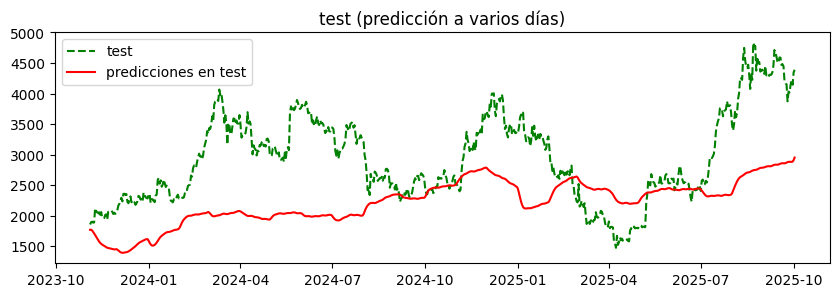

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(fechas_test, target_test, '--g', label='test')
plt.plot(fechas_test, sal, 'r', label='predicciones en test')
plt.title('test (predicción a varios días)')
plt.legend();

In [ ]:
preds = pd.DataFrame({"fecha": fechas_test,
                      "Sales estimados":sal})
preds.to_csv("predicciones.csv")
preds

,fecha,Sales estimados
0,2023-11-04,[1768.4332]
1,2023-11-05,[1771.0142]
2,2023-11-06,[1756.8273]
3,2023-11-07,[1734.3939]
4,2023-11-08,[1710.2257]
...,...,...
694,2025-09-28,[2880.664]
695,2025-09-29,[2880.6282]
696,2025-09-30,[2884.9075]
697,2025-10-01,[2909.3545]
